In [1]:
import numpy as np
import cartopy.crs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LinearSegmentedColormap
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
colors_operability = [(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(255/256,127/256,80/256),(255/256,127/256,80/256),(255/256,255/256,51/256),(255/256,255/256,51/256),(0,204/256,0)]
colors_wavepower = [(0,204/256,0),(255/256,255/256,51/256),(255/256,255/256,51/256),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0)]
vallocs = [2415,2305,4189,3389,2207,208,3989,2589,1940,3102]
valnames = ['Doraleh','Jiddah','Hay Point','Shanghai','Hadera','Long Beach','Tomakomai','Salalah','Cape Town','Geraldton']
hotlocs = [1940,192,3122,1473,2165,1378,4523,1548,1372,3385]
hotnames = ['CAPE TOWN','SAN FRANCISCO','FREMANTLE','RADE DE BREST','DURBAN','FOYNES','AUCKLAND','BORDEAUX','AGADIR','CHI-LUNG']
largelocs = [1465,3671,3304,3701,1845,1644,2075,3183,3360,1469,1960,2087,2043,3562,2957,1130,1493,1613,3499,1588,1606,950,3272,1609,1559,2999,899,1419,2235,3096,3385,1386,1548,1473,2378,1623,2882,2724,204,1167,2885,1552,1551,1628,2165,3669,4523,4520,2681,1378,3705,3122,2600,3921,2061,1820,1861,1907,4255,1512,1821,2102,2124,2430,1940,4245,4068,1540,1563,3746,1880,1916,1711,4291,3797,3390,921,1647,1739,371,663,2905,1575,675,674,508,738,2167,1372,2146,461,616,657,2013,1198,1182,2218,1946,1950,1776,338,192,387]
largenames = ['BELFAST','PUSAN','QINGDAO GANG','KASIM TERMINAL','NAPOLI','PENNINGTON OIL TERMINAL','RIGA','TIANJIN XIN GANG','DALIAN','TANGIER-MEDITERRANEAN','GDANSK','OULU','KOKKOLA','INCHON','JAKARTA','RIO GRANDE','ABIDJAN','LAGOS','CEBU','TARRAGONA','BARCELONA','HALIFAX','MANILA','ALGER','ORAN','CILACAP','CANAPORT (ST. JOHN)','CASABLANCA','BANIYAS','HONG KONG','CHI-LUNG','LISBOA','BORDEAUX','RADE DE BREST','RAS ISA MARINE TERMINAL','ROTTERDAM','BANGKOK','CHENNAI (MADRAS)','LOS ANGELES','SANTOS','PORT KLANG','SOUTHAMPTON','RADE DE CHERBOURG','AMSTERDAM','DURBAN','NAGASAKI','AUCKLAND','WELLINGTON','MUMBAI (BOMBAY)','FOYNES','WAKAMATSU KO','FREMANTLE','MINA JABAL ALI','YOKOHAMA KO','PIRAIEVS','PORTO DI LIDO-VENEZIA','RIJEKA LUKA','SPLIT','NEWCASTLE','LIVERPOOL','KOBENHAVN','HELSINKI','KOTKA','MUQDISHO','CAPE TOWN','SYDNEY','MELBOURNE','DUNDEE','TEESPORT','VLADIVOSTOK','SIRACUSA','TARANTO','GENOVA','BRISBANE','OSAKA','SHANGHAI','PUERTO LA CRUZ','TOULON','OSLO','LOOP TERMINAL','NORFOLK','JOHOR','PORT OF LE HAVRE','BAHIA DE SAGUA DE TANAMO','PUERTO GUANTANAMO','CIENFUEGOS','NEW YORK CITY','DAMIETTA','AGADIR','AL ISKANDARIYH (ALEXANDRIA)','BAHAI DE LA HABANA','NUEVITAS BAY','ANTILLA','PORI','TUBARA','RIO DE JANEIRO','BAYRUT','BRINDISI','STOCKHOLM','GOTEBORG','GALVESTON','SAN FRANCISCO','MOBILE']
name='my_list'
cwind ='#00a390'
cwave ='#eb7245'
cig ='#c41e79'
cwpow = '#77d3e9'
cmoperability = LinearSegmentedColormap.from_list(name, colors_operability, N=256)
cmwavepower = LinearSegmentedColormap.from_list(name, colors_wavepower, N=256)

In [3]:
data1 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run8_4560locs_d20_w138_s_2_i_005.xlsx')
data2 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run9_4560locs_d20_w108_s_15_i_004.xlsx')
data3 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run10_4560locs_d20_w171_s_25_i_006.xlsx')
data4 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run14_4560locs_d15_w138_s_2_i_005.xlsx')
data5 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run15_4560locs_d16_w138_s_2_i_005.xlsx')
data6 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run16_4560locs_d17_w138_s_2_i_005.xlsx')
data7 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run1_seasons_d20_w138_s_2_i_005.xlsx')
data8 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run3_yearly_4560locs_d20_w138_s_2_i_005.xlsx')
data9 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run17_4560locs_d20_w138_s_2_i_005_wind5.xlsx')
data10 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run18_4560locs_d20_w138_s_2_i_005_waves5.xlsx')
data11 = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run21_4560locs_d21_w138_s_2_i_005_future.xlsx')

In [4]:
val1 = data1.loc[data1['index']==vallocs[0]]
for i in range(1,10):
    data = data1.loc[data1['index']==vallocs[i]]
    val1 = val1.append(data)
val1.loc[:,'name'] = valnames

val2 = data2.loc[data2['index']==vallocs[0]]
for i in range(1,10):
    data = data2.loc[data2['index']==vallocs[i]]
    val2 = val2.append(data)
val2.loc[:,'name'] = valnames

val3 = data3.loc[data3['index']==vallocs[0]]
for i in range(1,10):
    data = data3.loc[data3['index']==vallocs[i]]
    val3 = val3.append(data)
val3.loc[:,'name'] = valnames

val4 = data4.loc[data4['index']==vallocs[0]]
for i in range(1,10):
    data = data4.loc[data4['index']==vallocs[i]]
    val4 = val4.append(data)
val4.loc[:,'name'] = valnames

val5 = data5.loc[data5['index']==vallocs[0]]
for i in range(1,10):
    data = data5.loc[data5['index']==vallocs[i]]
    val5 = val5.append(data)
val5.loc[:,'name'] = valnames

val6 = data6.loc[data6['index']==vallocs[0]]
for i in range(1,10):
    data = data6.loc[data6['index']==vallocs[i]]
    val6 = val6.append(data)
val6.loc[:,'name'] = valnames

val7 = data7.loc[data7['index']==vallocs[0]]
for i in range(1,10):
    data = data7.loc[data7['index']==vallocs[i]]
    val7 = val7.append(data)
val7.loc[:,'name'] = valnames

val8 = data8.loc[data8['index']==vallocs[0]]
for i in range(1,10):
    data = data8.loc[data8['index']==vallocs[i]]
    val8 = val8.append(data)
val8.loc[:,'name'] = valnames

In [5]:
hot1 = data1.loc[data1['index']==hotlocs[0]]
for i in range(1,10):
    data = data1.loc[data1['index']==hotlocs[i]]
    hot1 = hot1.append(data)
hot1.loc[:,'name'] = hotnames

hot2 = data2.loc[data2['index']==hotlocs[0]]
for i in range(1,10):
    data = data2.loc[data2['index']==hotlocs[i]]
    hot2 = hot2.append(data)
hot2.loc[:,'name'] = hotnames

hot3 = data3.loc[data3['index']==hotlocs[0]]
for i in range(1,10):
    data = data3.loc[data3['index']==hotlocs[i]]
    hot3 = hot3.append(data)
hot3.loc[:,'name'] = hotnames

hot4 = data4.loc[data4['index']==hotlocs[0]]
for i in range(1,10):
    data = data4.loc[data4['index']==hotlocs[i]]
    hot4 = hot4.append(data)
hot4.loc[:,'name'] = hotnames

hot5 = data5.loc[data5['index']==hotlocs[0]]
for i in range(1,10):
    data = data5.loc[data5['index']==hotlocs[i]]
    hot5 = hot5.append(data)
hot5.loc[:,'name'] = hotnames

hot6 = data6.loc[data6['index']==hotlocs[0]]
for i in range(1,10):
    data = data6.loc[data6['index']==hotlocs[i]]
    hot6 = hot6.append(data)
hot6.loc[:,'name'] = hotnames

hot7 = data7.loc[data7['index']==hotlocs[0]]
for i in range(1,10):
    data = data7.loc[data7['index']==hotlocs[i]]
    hot7 = hot7.append(data)
hot7.loc[:,'name'] = hotnames

hot8 = data8.loc[data8['index']==hotlocs[0]]
for i in range(1,10):
    data = data8.loc[data8['index']==hotlocs[i]]
    hot8 = hot8.append(data)
hot8.loc[:,'name'] = hotnames

hot9 = data9.loc[data9['index']==hotlocs[0]]
for i in range(1,10):
    data = data9.loc[data9['index']==hotlocs[i]]
    hot9 = hot9.append(data)
hot9.loc[:,'name'] = hotnames

hot10 = data10.loc[data10['index']==hotlocs[0]]
for i in range(1,10):
    data = data10.loc[data10['index']==hotlocs[i]]
    hot10 = hot10.append(data)
hot10.loc[:,'name'] = hotnames

hot11 = data11.loc[data11['index']==hotlocs[0]]
for i in range(1,10):
    data = data11.loc[data11['index']==hotlocs[i]]
    hot11 = hot11.append(data)
hot11.loc[:,'name'] = hotnames

In [6]:
large1 = data1.loc[data1['index']==largelocs[0]]
for i in range(1,103):
    data = data1.loc[data1['index']==largelocs[i]]
    large1 = large1.append(data)
large1.loc[:,'name'] = largenames

large2 = data2.loc[data2['index']==largelocs[0]]
for i in range(1,103):
    data = data2.loc[data2['index']==largelocs[i]]
    large2 = large2.append(data)
large2.loc[:,'name'] = largenames

large3 = data3.loc[data3['index']==largelocs[0]]
for i in range(1,103):
    data = data3.loc[data3['index']==largelocs[i]]
    large3 = large3.append(data)
large3.loc[:,'name'] = largenames

large4 = data4.loc[data4['index']==largelocs[0]]
for i in range(1,103):
    data = data4.loc[data4['index']==largelocs[i]]
    large4 = large4.append(data)
large4.loc[:,'name'] = largenames

large5 = data5.loc[data1['index']==largelocs[0]]
for i in range(1,103):
    data = data5.loc[data5['index']==largelocs[i]]
    large5 = large5.append(data)
large5.loc[:,'name'] = largenames

large6 = data6.loc[data6['index']==largelocs[0]]
for i in range(1,103):
    data = data6.loc[data6['index']==largelocs[i]]
    large6 = large6.append(data)
large6.loc[:,'name'] = largenames

large7 = data7.loc[data7['index']==largelocs[0]]
for i in range(1,103):
    data = data7.loc[data7['index']==largelocs[i]]
    large7 = large7.append(data)
large7.loc[:,'name'] = largenames

large8 = data8.loc[data8['index']==largelocs[0]]
for i in range(1,103):
    data = data8.loc[data8['index']==largelocs[i]]
    large8 = large8.append(data)
large8.loc[:,'name'] = largenames

large9 = data9.loc[data9['index']==largelocs[0]]
for i in range(1,103):
    data = data9.loc[data9['index']==largelocs[i]]
    large9 = large9.append(data)
large9.loc[:,'name'] = largenames

large10 = data10.loc[data10['index']==largelocs[0]]
for i in range(1,103):
    data = data10.loc[data10['index']==largelocs[i]]
    large10 = large10.append(data)
large10.loc[:,'name'] = largenames

large11 = data11.loc[data11['index']==largelocs[0]]
for i in range(1,103):
    data = data11.loc[data11['index']==largelocs[i]]
    large11 = large11.append(data)
large11.loc[:,'name'] = largenames

In [7]:
data= ['data1','data2','data3','data4','data5','data6','data9','data10','data11']
datas= [data1,data2,data3,data4,data5,data6,data9,data10,data11]
dfdata = pd.DataFrame(columns = data)
for i,j in zip(datas,data): 
    dfdata.loc[:,j] = i.mean()

In [8]:
vals= ['val1','val2','val3','val4','val5','val6']
vals1= [val1,val2,val3,val4,val5,val6]
dfval = pd.DataFrame(columns = vals)
for i,j in zip(vals1,vals): 
    dfval.loc[:,j] = i.mean()

In [9]:
hot= ['hot1','hot2','hot3','hot4','hot5','hot6','hot9','hot10','hot11']
hots= [hot1,hot2,hot3,hot4,hot5,hot6,hot9,hot10,hot11]
dfhot = pd.DataFrame(columns = hot)
for i,j in zip(hots,hot): 
    dfhot.loc[:,j] = i.mean()

In [10]:
large= ['large1','large2','large3','large4','large5','large6','large9','large10','large11']
larges= [large1,large2,large3,large4,large5,large6,large9,large10,large11]
dflarge = pd.DataFrame(columns = large)
for i,j in zip(larges,large): 
    dflarge.loc[:,j] = i.mean()

In [11]:
hot7.mean()
large7.mean()
data7.mean()
dfseasons = pd.DataFrame(columns = ['hot7','large7','data7'])
dfseasons.loc[:,'hot7'] = val7.mean()
dfseasons.loc[:,'large7'] = large7.mean()
dfseasons.loc[:,'data7'] = data7.mean()

In [12]:
hot8.mean()
large8.mean()
data8.mean()
dfyearly = pd.DataFrame(columns = ['hot8','large8','data8'])
dfyearly.loc[:,'hot8'] = val8.mean()
dfyearly.loc[:,'large8'] = large8.mean()
dfyearly.loc[:,'data8'] = data8.mean()

In [ ]:
dfdata.to_excel('dfdata1.xlsx')
#dflarge.to_excel('dflarge.xlsx')
#dfhot.to_excel('dfhot.xlsx')
#dfseasons.to_excel('dfseasons.xlsx')
#dfyearly.to_excel('dfyearly.xlsx')

Text(79.5, 4.5, 'Water depth: 20 [m]')

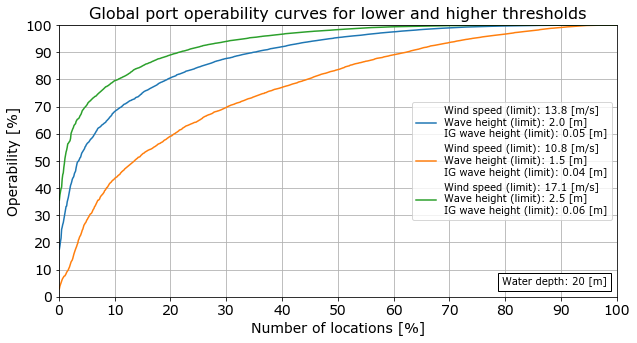

In [23]:
## THRESHOLDS - data1 data2 data3
x = np.arange(0.001,1.001,0.001)
operability1 = data1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
operability2 = data2.operability.dropna().copy()
tot_operability2 = operability2.quantile(q=x)
operability3 = data3.operability.dropna().copy()
tot_operability3 = operability3.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, label='Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')
ax.plot(x*100, tot_operability2, label='Wind speed (limit): 10.8 [m/s] \nWave height (limit): 1.5 [m] \nIG wave height (limit): 0.04 [m]')
ax.plot(x*100, tot_operability3, label='Wind speed (limit): 17.1 [m/s] \nWave height (limit): 2.5 [m] \nIG wave height (limit): 0.06 [m]')
#ax.plot(0,0,color='#ffffff',label='Water depth: 20 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for lower and higher thresholds', fontsize=16)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='center right', fontsize=10, markerscale=3)
ax.text(79.5, 4.5, 'Water depth: 20 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_different_threshold.png', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Global port operability map SON (September/October/November) (1979-01-01 - 2018-12-31)')

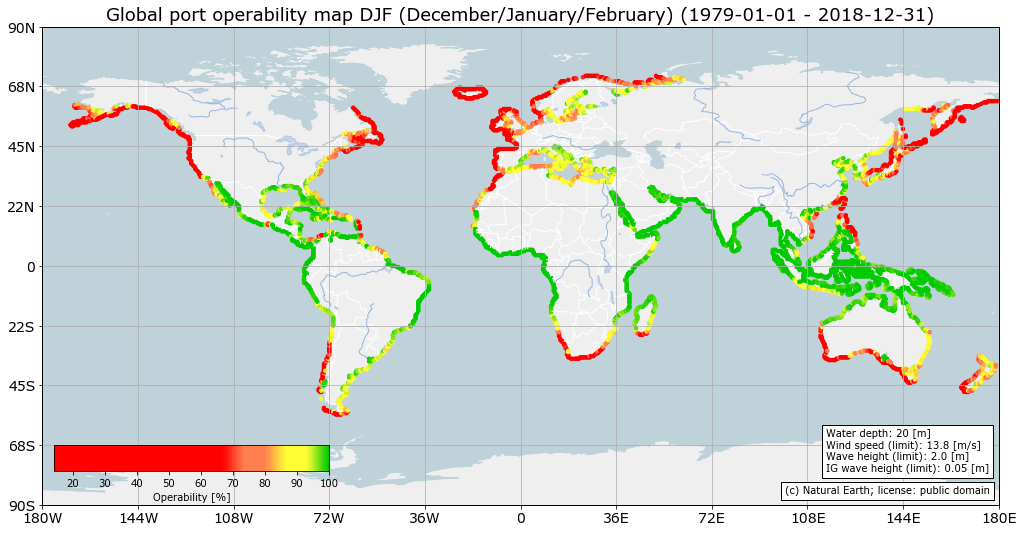

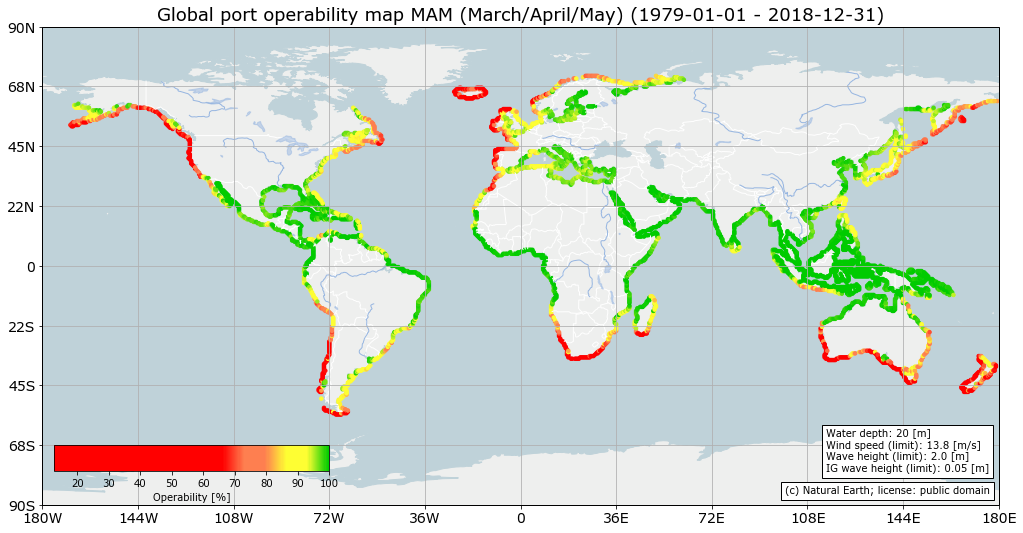

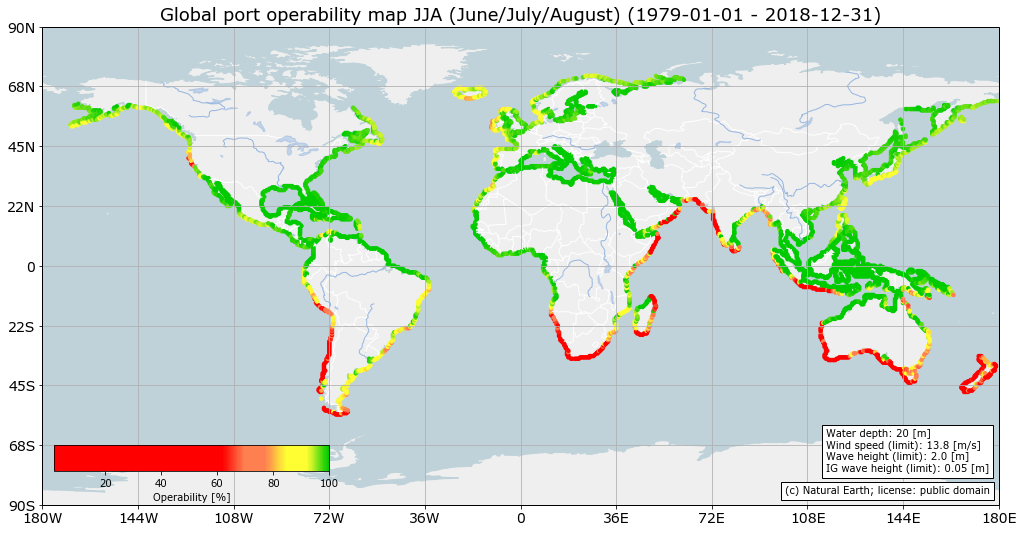

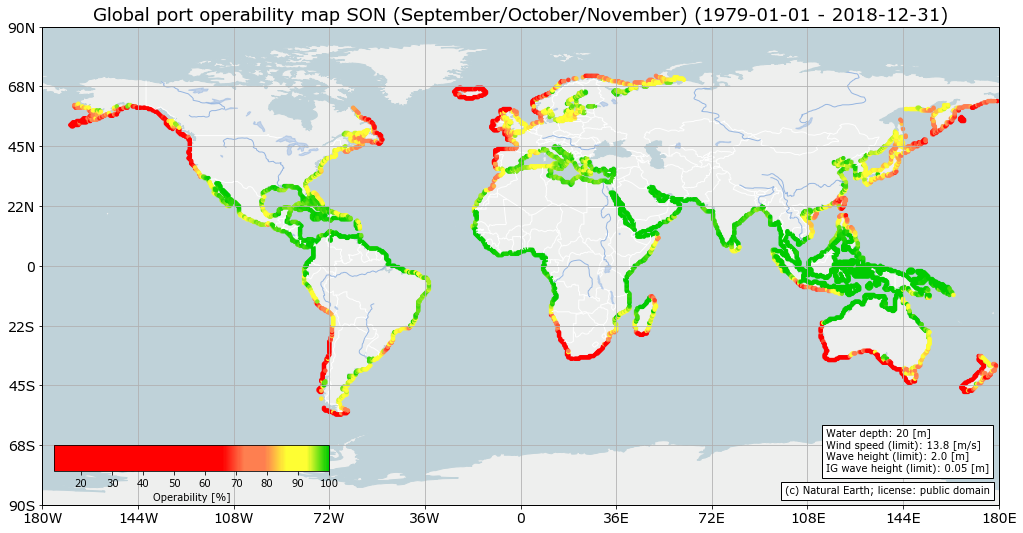

In [24]:
## SEASONALITY
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data7['lon'],data7['lat'], c=data7['operabilityDJF'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map DJF (December/January/February) (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_DJF.png', dpi=300, bbox_inches='tight');

plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data7['lon'],data7['lat'], c=data7['operabilityMAM'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map MAM (March/April/May) (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_MAM.png', dpi=300, bbox_inches='tight');

plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data7['lon'],data7['lat'], c=data7['operabilityJJA'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map JJA (June/July/August) (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_JJA.png', dpi=300, bbox_inches='tight');

plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data7['lon'],data7['lat'], c=data7['operabilitySON'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map SON (September/October/November) (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_SON.png', dpi=300, bbox_inches='tight');

Text(0, 0.5, 'Operability [%]')

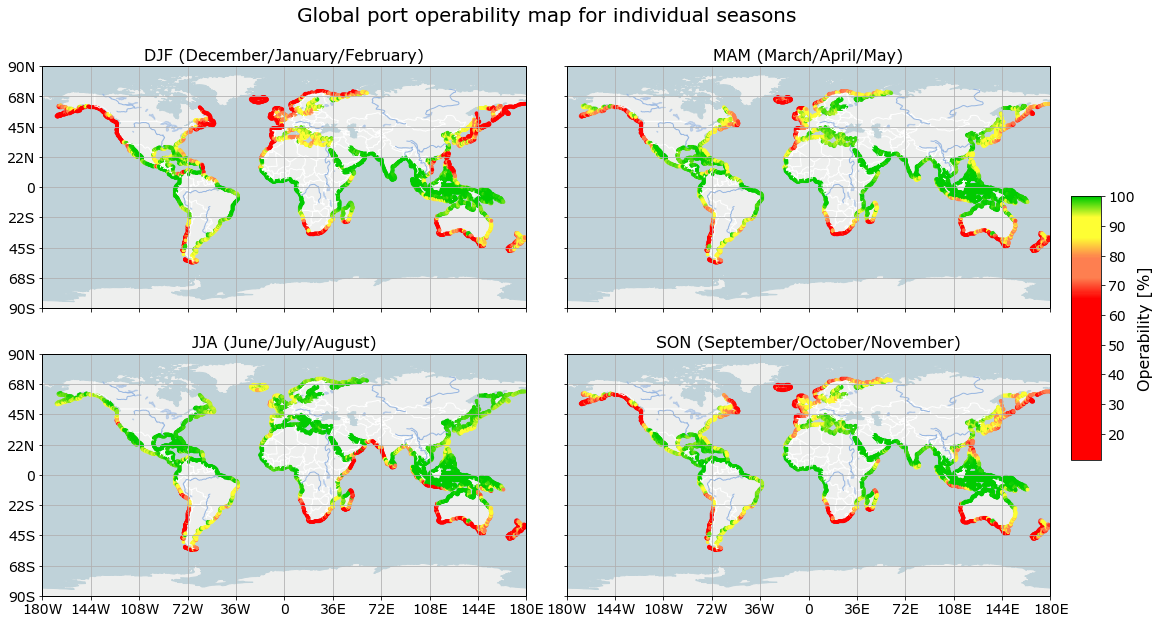

In [27]:
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)

fig = plt.figure(figsize=(14,8.5))#fig.subplots_adjust(hspace=0.1)
fig.suptitle('Global port operability map for individual seasons', fontsize=20)

ax1 = plt.axes([0, 0.47, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax1.grid()
_ = ax1.set_xlim(-180,180)
_ = ax1.set_ylim(-90,90)
_ = ax1.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax1.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax1.scatter(data7['lon'],data7['lat'], c=data7['operabilityDJF'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax1.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax1.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax1.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax1.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax1.add_feature(cartopy.feature.RIVERS)
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticklabels([])
ax1.set_title('DJF (December/January/February)', fontsize=16)

ax2 = plt.axes([0.52, 0.47, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax2.grid()
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax2.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax2.scatter(data7['lon'],data7['lat'], c=data7['operabilityMAM'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax2.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax2.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax2.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax2.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax2.add_feature(cartopy.feature.RIVERS)
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title('MAM (March/April/May)', fontsize=16)

ax3 = plt.axes([0, 0, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax3.grid()
ax3.set_xlim(-180,180)
ax3.set_ylim(-90,90)
ax3.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax3.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax3.scatter(data7['lon'],data7['lat'], c=data7['operabilityJJA'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax3.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax3.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax3.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax3.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax3.add_feature(cartopy.feature.RIVERS)
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_title('JJA (June/July/August)', fontsize=16)

ax4 = plt.axes([0.52, 0, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax4.grid()
ax4.set_xlim(-180,180)
ax4.set_ylim(-90,90)
ax4.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax4.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax4.scatter(data7['lon'],data7['lat'], c=data7['operabilitySON'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax4.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax4.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax4.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax4.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax4.add_feature(cartopy.feature.RIVERS)
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.tick_params(axis='both', labelsize=14)
ax4.set_yticklabels([])
ax4.set_title('SON (September/October/November)', fontsize=16)

cax = plt.axes([1.02,0.24,0.03,0.43])
cbar = plt.colorbar(pc, ax=ax, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Operability [%]', size=16)

#plt.savefig('global_port_operability_map_four_seasons.png', dpi=300, bbox_inches='tight');

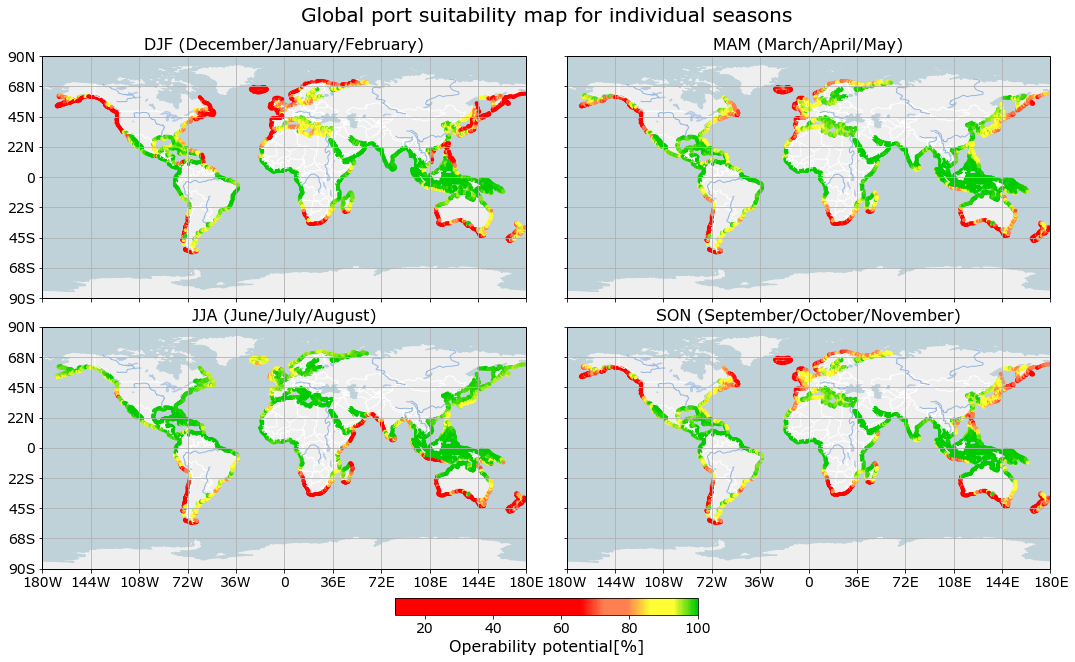

In [18]:
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)

fig = plt.figure(figsize=(14,8))#fig.subplots_adjust(hspace=0.1)
fig.suptitle('Global port suitability map for individual seasons', fontsize=20)

ax1 = plt.axes([0, 0.47, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax1.grid()
_ = ax1.set_xlim(-180,180)
_ = ax1.set_ylim(-90,90)
_ = ax1.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax1.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax1.scatter(data7['lon'],data7['lat'], c=data7['operabilityDJF'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax1.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax1.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax1.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax1.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax1.add_feature(cartopy.feature.RIVERS)
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticklabels([])
ax1.set_title('DJF (December/January/February)', fontsize=16)

ax2 = plt.axes([0.52, 0.47, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax2.grid()
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax2.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax2.scatter(data7['lon'],data7['lat'], c=data7['operabilityMAM'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax2.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax2.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax2.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax2.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax2.add_feature(cartopy.feature.RIVERS)
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title('MAM (March/April/May)', fontsize=16)

ax3 = plt.axes([0, 0, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax3.grid()
ax3.set_xlim(-180,180)
ax3.set_ylim(-90,90)
ax3.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax3.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax3.scatter(data7['lon'],data7['lat'], c=data7['operabilityJJA'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax3.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax3.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax3.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax3.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax3.add_feature(cartopy.feature.RIVERS)
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_title('JJA (June/July/August)', fontsize=16)

ax4 = plt.axes([0.52, 0, 0.48, 0.43],projection=cartopy.crs.PlateCarree())
ax4.grid()
ax4.set_xlim(-180,180)
ax4.set_ylim(-90,90)
ax4.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
ax4.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax4.scatter(data7['lon'],data7['lat'], c=data7['operabilitySON'], s=8, cmap=cmoperability)#, cmap='RdYlGn_r')     
ax4.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax4.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax4.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax4.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax4.add_feature(cartopy.feature.RIVERS)
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.tick_params(axis='both', labelsize=14)
ax4.set_yticklabels([])
ax4.set_title('SON (September/October/November)', fontsize=16)

cax = plt.axes([0.35,-0.075,0.3,0.03])
cbar = plt.colorbar(pc, ax=ax1, cax=cax, orientation='horizontal')
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xlabel('Operability potential[%]', size=16)

plt.savefig('global_port_operability_map_four_seasons_2.png', dpi=300, bbox_inches='tight');

Text(69, 4.5, 'Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

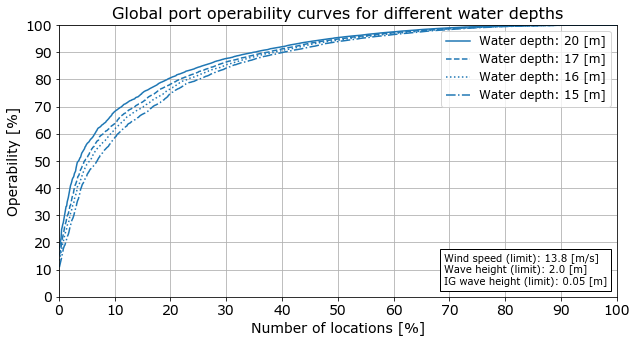

In [16]:
## WATER DEPTHS - data1 data4 data5 data6- Proxy for sea-level rise
x = np.arange(0.001,1.001,0.001)
operability1 = data1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
operability4 = data4.operability.dropna().copy()
tot_operability4 = operability4.quantile(q=x)
operability5 = data5.operability.dropna().copy()
tot_operability5 = operability5.quantile(q=x)
operability6 = data6.operability.dropna().copy()
tot_operability6 = operability6.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, color='C0', label='Water depth: 20 [m]')
ax.plot(x*100, tot_operability6, color='C0', linestyle='dashed', label='Water depth: 17 [m]')
ax.plot(x*100, tot_operability5, color='C0', linestyle='dotted', label='Water depth: 16 [m]')
ax.plot(x*100, tot_operability4, color='C0', linestyle='dashdot', label='Water depth: 15 [m]')
#ax.plot(0,0,color='#ffffff',label='Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for different water depths', fontsize=16)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right', fontsize=12, markerscale=3)
ax.text(69, 4.5, 'Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_different_waterdepths_2.png', dpi=300, bbox_inches='tight');

Text(69, 4.5, 'Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

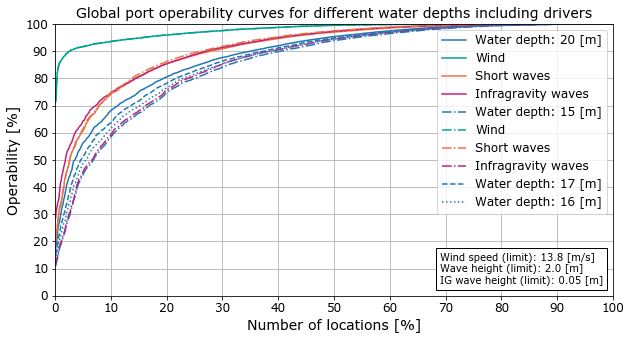

In [30]:
## WATER DEPTHS - data1 data4 including drivers
x = np.arange(0.001,1.001,0.001)
operability1 = data1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
windOP1 = data1.windAvUp.dropna().copy()
wavesOP1 = data1.swhAvUp.dropna().copy()
igOP1 = data1.igAvUp.dropna().copy()
wind_availability1 = windOP1.quantile(q=x)
waves_availability1 = wavesOP1.quantile(q=x)
infragravity_availability1 = igOP1.quantile(q=x)
operability4 = data4.operability.dropna().copy()
tot_operability4 = operability4.quantile(q=x)
windOP4 = data4.windAvUp.dropna().copy()
wavesOP4 = data4.swhAvUp.dropna().copy()
igOP4 = data4.igAvUp.dropna().copy()
wind_availability4 = windOP4.quantile(q=x)
waves_availability4 = wavesOP4.quantile(q=x)
infragravity_availability4 = igOP4.quantile(q=x)
operability5 = data5.operability.dropna().copy()
tot_operability5 = operability5.quantile(q=x)
operability6 = data6.operability.dropna().copy()
tot_operability6 = operability6.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, color='C0', label='Water depth: 20 [m]')
ax.plot(x*100, wind_availability1, color=cwind,  label='Wind')
ax.plot(x*100, waves_availability1, color=cwave,  label='Short waves')
ax.plot(x*100, infragravity_availability1, color=cig,  label='Infragravity waves')
ax.plot(x*100, tot_operability4, color='C0', linestyle='dashdot',label='Water depth: 15 [m]')
ax.plot(x*100, wind_availability4, color=cwind, linestyle='dashdot',label='Wind')
ax.plot(x*100, waves_availability4, color=cwave, linestyle='dashdot',label='Short waves')
ax.plot(x*100, infragravity_availability4, color=cig, linestyle='dashdot',label='Infragravity waves')
ax.plot(x*100, tot_operability6, color='C0', linestyle='dashed', label='Water depth: 17 [m]')
ax.plot(x*100, tot_operability5, color='C0', linestyle='dotted', label='Water depth: 16 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for different water depths including drivers', fontsize=14)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right', fontsize=12, markerscale=3)
ax.text(69, 4.5, 'Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_d20_depths_drivers.png', dpi=300, bbox_inches='tight');

Text(68.5, 4.5, 'IG wave height (limit): 0.05 [m]')

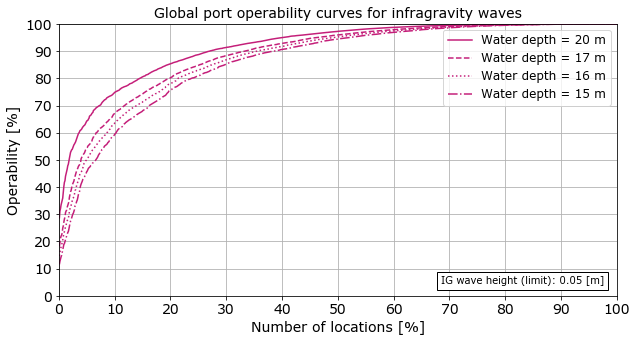

In [32]:
## WATER DEPTHS - CAUSE - IG WAVES
x = np.arange(0.001,1.001,0.001)
operability1 = data1.igAvUp.dropna().copy()
operability4 = data4.igAvUp.dropna().copy()
operability5 = data5.igAvUp.dropna().copy()
operability6 = data6.igAvUp.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
tot_operability4 = operability4.quantile(q=x)
tot_operability5 = operability5.quantile(q=x)
tot_operability6 = operability6.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, color=cig, label='Water depth = 20 m')
ax.plot(x*100, tot_operability6, color=cig, linestyle='dashed', label='Water depth = 17 m')
ax.plot(x*100, tot_operability5, color=cig, linestyle='dotted', label='Water depth = 16 m')
ax.plot(x*100, tot_operability4, color=cig, linestyle='dashdot', label='Water depth = 15 m')
#ax.plot(0,0,color='#ffffff',label='IG wave height (limit): 0.05 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for infragravity waves', fontsize=14)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right', fontsize=12, markerscale=1)
ax.text(68.5, 4.5, 'IG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_availability_curve_ig_wave_differemt_depths.png', dpi=300, bbox_inches='tight')

In [123]:
## INCREASING WIND AND WAVES


Text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

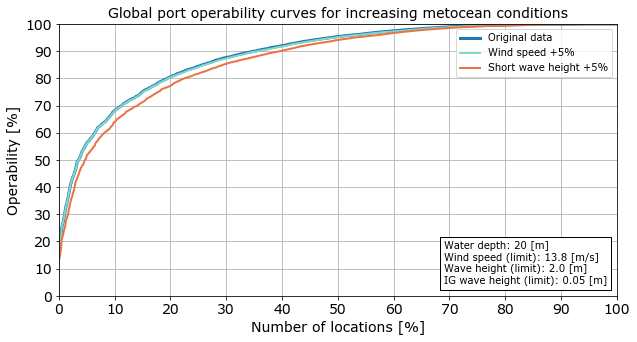

In [33]:
x = np.arange(0.001,1.001,0.001)
operability1 = data1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
operability9 = data9.operability.dropna().copy()
tot_operability9 = operability9.quantile(q=x)
operability10 = data10.operability.dropna().copy()
tot_operability10 = operability10.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1,linewidth=3, label='Original data')
ax.plot(x*100, tot_operability9, color='#82d7c6',linewidth=2, label='Wind speed +5%')
ax.plot(x*100, tot_operability10, color=cwave, linewidth=2, label='Short wave height +5%')
#ax.plot(0,0,color='#ffffff',label='Water depth: 20 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for increasing metocean conditions', fontsize=14)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right', fontsize=10, markerscale=1)
ax.text(79.5, 4.5, 'Water depth: 20 [m]', bbox={'facecolor': 'white', 'alpha': 1})
ax.text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_increased_wind_waves.png', dpi=300, bbox_inches='tight');

Text(79.5, 4.5, 'Water depth: 20 [m]')

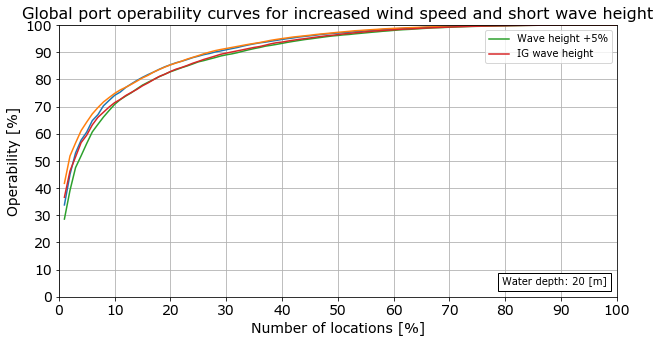

In [35]:
x = np.arange(0.01,1.01,0.01)
operability1 = data1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
windOP1 = data1.windAvUp.dropna().copy()
wavesOP1 = data1.swhAvUp.dropna().copy()
igOP1 = data1.igAvUp.dropna().copy()
wind_availability1 = windOP1.quantile(q=x)
waves_availability1 = wavesOP1.quantile(q=x)
infragravity_availability1 = igOP1.quantile(q=x)
operability10 = data10.operability.dropna().copy()
tot_operability10 = operability10.quantile(q=x)
windOP10 = data10.windAvUp.dropna().copy()
wavesOP10 = data10.swhAvUp.dropna().copy()
igOP10 = data10.igAvUp.dropna().copy()
wind_availability10 = windOP10.quantile(q=x)
waves_availability10 = wavesOP10.quantile(q=x)
infragravity_availability10 = igOP10.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, waves_availability1)
ax.plot(x*100, infragravity_availability1)#,linewidth=3, label='Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')
ax.plot(x*100, waves_availability10, label='Wave height +5%')
ax.plot(x*100, infragravity_availability10, label='IG wave height')
#ax.plot(x*100, tot_operability9, color='#82d7c6', marker='^', linestyle='dashed',linewidth=2, label='Wind speed +5%')
#ax.plot(x*100, tot_operability10, color=cwave, marker='o', linestyle='dashed',linewidth=2, label='Wave height +5%')
#ax.plot(0,0,color='#ffffff',label='Water depth: 20 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curves for increased wind speed and short wave height', fontsize=16)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right', fontsize=10, markerscale=1)
ax.text(79.5, 4.5, 'Water depth: 20 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_increased_wind_waves.png', dpi=300, bbox_inches='tight');

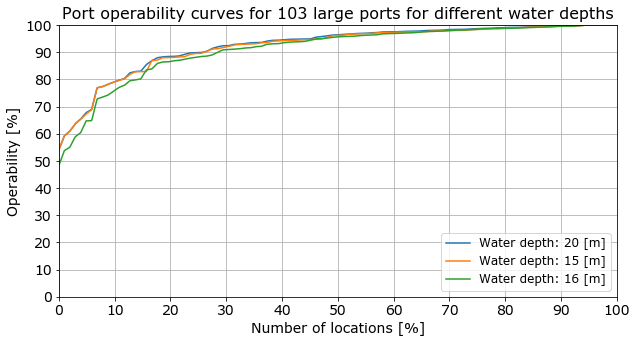

In [36]:
x = np.arange(0.001,1.001,0.001)
operability1 = large1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
operability9 = large9.operability.dropna().copy()
tot_operability9 = operability9.quantile(q=x)
operability10 = large10.operability.dropna().copy()
tot_operability10 = operability10.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, label='Water depth: 20 [m]')
ax.plot(x*100, tot_operability9, label='Water depth: 15 [m]')
ax.plot(x*100, tot_operability10, label='Water depth: 16 [m]')
#ax.plot(0,0,color='#ffffff',label='Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Port operability curves for 103 large ports for different water depths', fontsize=16)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='lower right', fontsize=12, markerscale=3)

#plt.savefig('global_port_operability_curve_different_waterdepths_103.png', dpi=300, bbox_inches='tight');

In [14]:
## CHANGING OVER TIME
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
z = np.arange(1979,2019)

In [16]:
dfyearly.iloc[28] = (dfyearly.iloc[27] + dfyearly.iloc[29])/2
dfyearly.iloc[269] = (dfyearly.iloc[268] + dfyearly.iloc[270])/2
dfyearly.iloc[229] = (dfyearly.iloc[228] + dfyearly.iloc[230])/2
dfyearly.iloc[189] = (dfyearly.iloc[188] + dfyearly.iloc[190])/2

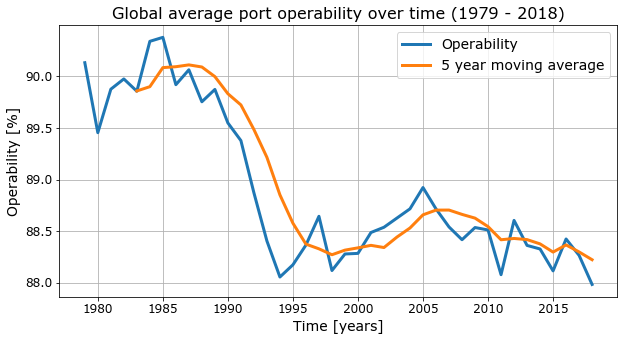

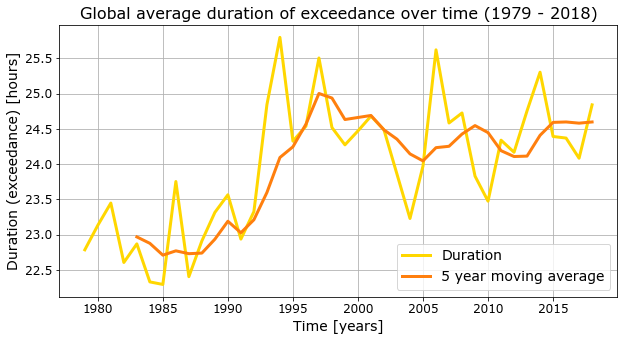

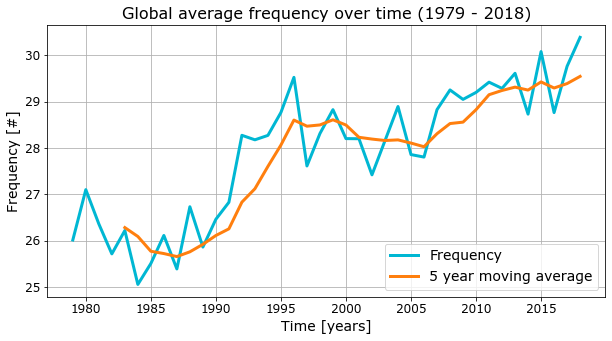

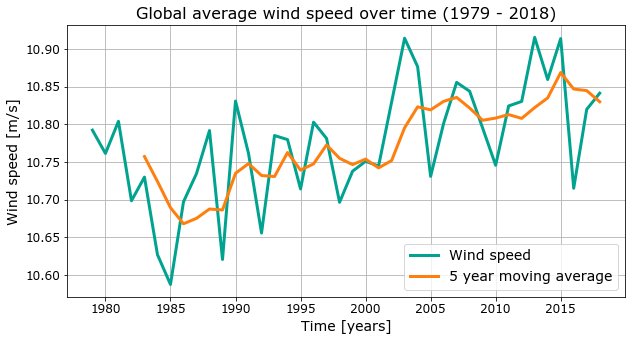

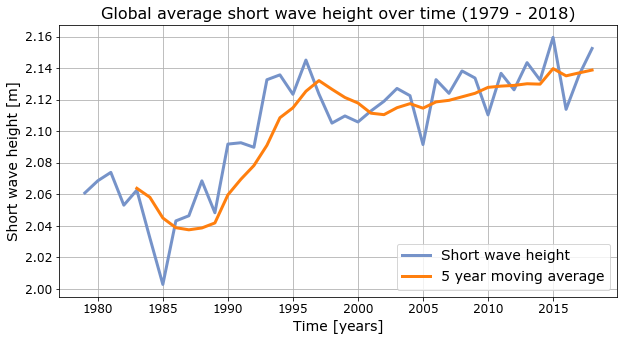

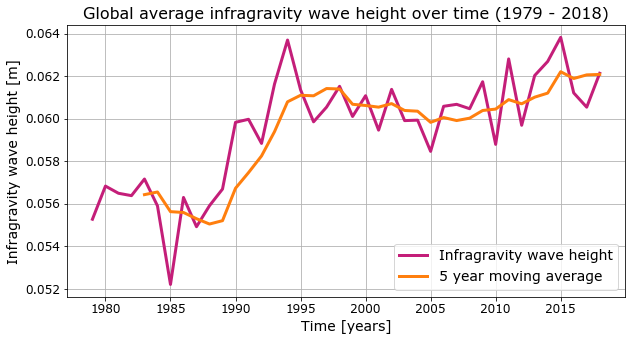

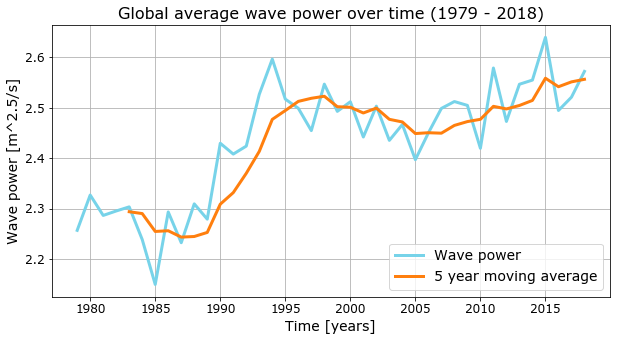

In [78]:
z = np.arange(1979,2019)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[245:285,2].to_list(), linewidth=3, label='Operability')
ax.plot(z[4:],moving_average(dfyearly.iloc[245:285,2].to_list()), linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average port operability over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='upper right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_port_operability_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[205:245,2].to_list(), color='gold', linewidth=3, label='Duration')
ax.plot(z[4:],moving_average(dfyearly.iloc[205:245,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average duration of exceedance over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Duration (exceedance) [hours]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_exceedance_duration_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[165:205,2].to_list(), color = '#00b7d3', linewidth=3, label='Frequency')
ax.plot(z[4:],moving_average(dfyearly.iloc[165:205,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average frequency over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Frequency [#]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_frequency_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[5:45,2].to_list(), color = cwind,  linewidth=3, label='Wind speed')
ax.plot(z[4:],moving_average(dfyearly.iloc[5:45,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average wind speed over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Wind speed [m/s]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_frequency_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[45:85,2].to_list(), color = '#7693c9', linewidth=3, label='Short wave height')
ax.plot(z[4:],moving_average(dfyearly.iloc[45:85,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average short wave height over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Short wave height [m]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_frequency_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[85:125,2].to_list(), color = cig, linewidth=3, label='Infragravity wave height')
ax.plot(z[4:],moving_average(dfyearly.iloc[85:125,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average infragravity wave height over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Infragravity wave height [m]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_frequency_over_time_40years.png', dpi=300, bbox_inches='tight');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z,dfyearly.iloc[125:165,2].to_list(), color=cwpow, linewidth=3, label='Wave power')
ax.plot(z[4:],moving_average(dfyearly.iloc[125:165,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax.grid()
ax.set_title('Global average wave power over time (1979 - 2018)', fontsize=16)
ax.set_xlabel('Time [years]', size=14)
ax.set_ylabel('Wave power [m^2.5/s]', size=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('global_average_frequency_over_time_40years.png', dpi=300, bbox_inches='tight');

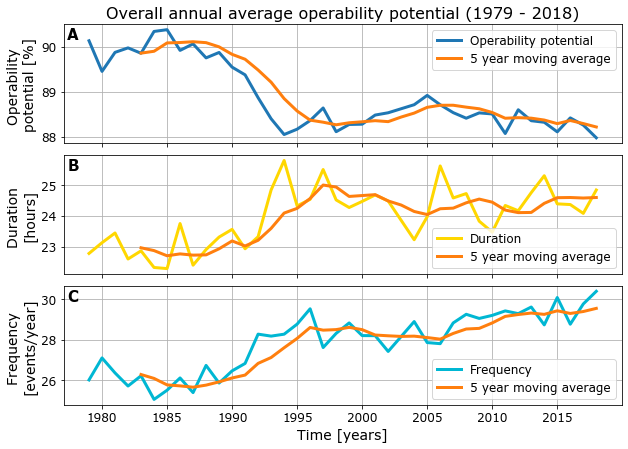

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.1)
fig.text(0.13,0.85, 'A', fontsize=15, weight='bold')
fig.text(0.13,0.59, 'B', fontsize=15, weight='bold')
fig.text(0.13,0.33, 'C', fontsize=15, weight='bold')

ax1.plot(z,dfyearly.iloc[245:285,2].to_list(), linewidth=3, label='Operability potential')
ax1.plot(z[4:],moving_average(dfyearly.iloc[245:285,2].to_list()), linewidth=3, label='5 year moving average')
ax1.grid()
ax1.set_title('Overall annual average operability potential (1979 - 2018)', fontsize=16)
ax1.set_ylabel('Operability \npotential [%]', size=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.legend(loc='upper right',  fontsize=12, markerscale=3)
ax1.set_xticklabels([])

ax2.plot(z,dfyearly.iloc[205:245,2].to_list(), color='gold', linewidth=3, label='Duration')
ax2.plot(z[4:],moving_average(dfyearly.iloc[205:245,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax2.grid()
ax2.set_ylabel('Duration \n[hours]', size=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(loc='lower right',  fontsize=12, markerscale=3)
ax2.set_xticklabels([])

ax3.plot(z,dfyearly.iloc[165:205,2].to_list(), color = '#00b7d3', linewidth=3, label='Frequency')
ax3.plot(z[4:],moving_average(dfyearly.iloc[165:205,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax3.grid()
ax3.set_xlabel('Time [years]', size=14)
ax3.set_ylabel('Frequency \n[events/year]', size=14)
ax3.tick_params(axis='both', labelsize=12)
ax3.legend(loc='lower right',  fontsize=12, markerscale=3)

#plt.savefig('global_average_port_operability_estimates_over_time_40years_4.png', dpi=300, bbox_inches='tight');

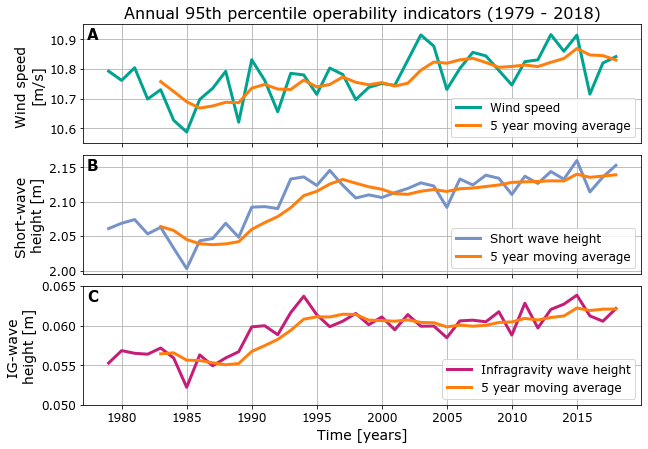

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.1)
fig.text(0.13,0.85, 'A', fontsize=15, weight='bold')
fig.text(0.13,0.59, 'B', fontsize=15, weight='bold')
fig.text(0.13,0.33, 'C', fontsize=15, weight='bold')
#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))
#fig.subplots_adjust(hspace=0.1)
#fig.text(0.13,0.85, 'A', fontsize=15, weight='bold')
#fig.text(0.13,0.655, 'B', fontsize=15, weight='bold')
#fig.text(0.13,0.465, 'C', fontsize=15, weight='bold')
#fig.text(0.13,0.27, 'D', fontsize=15, weight='bold')

ax1.plot(z,dfyearly.iloc[5:45,2].to_list(), color = cwind,  linewidth=3, label='Wind speed')
ax1.plot(z[4:],moving_average(dfyearly.iloc[5:45,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax1.grid()
ax1.set_ylim(10.55,10.95)
ax1.set_title('Annual 95th percentile operability indicators (1979 - 2018)', fontsize=16)
ax1.set_ylabel('Wind speed \n[m/s]', size=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.legend(loc='lower right',  fontsize=12, markerscale=3)
ax1.set_xticklabels([])

ax2.plot(z,dfyearly.iloc[45:85,2].to_list(), color = '#7693c9', linewidth=3, label='Short wave height')
ax2.plot(z[4:],moving_average(dfyearly.iloc[45:85,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax2.grid()

ax2.set_ylabel('Short-wave \nheight [m]', size=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(loc='lower right',  fontsize=12, markerscale=3)
ax2.set_xticklabels([])

ax3.plot(z,dfyearly.iloc[85:125,2].to_list(), color = cig, linewidth=3, label='Infragravity wave height')
ax3.plot(z[4:],moving_average(dfyearly.iloc[85:125,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
ax3.grid()
ax3.set_ylim(0.05,0.065)
ax3.set_ylabel('IG-wave \nheight [m]', size=14)
ax3.set_xlabel('Time [years]', size=14)
ax3.tick_params(axis='both', labelsize=12)
ax3.legend(loc='lower right',  fontsize=12, markerscale=3)
#ax3.set_xticklabels([])

#ax4.plot(z,dfyearly.iloc[125:165,2].to_list(), color=cwpow, linewidth=3, label='Wave power')
#ax4.plot(z[4:],moving_average(dfyearly.iloc[125:165,2].to_list()), color='C1', linewidth=3, label='5 year moving average')
#ax4.grid()
#ax4.set_xlabel('Time [years]', size=14)
#ax4.set_ylabel('Wave power \n[m^2.5/s]', size=14)
#ax4.tick_params(axis='both', labelsize=12)
#ax4.legend(loc='lower right',  fontsize=12, markerscale=3)

plt.savefig('global_average_metocean_conditions_over_time_40years_5.png', dpi=300, bbox_inches='tight');

In [ ]:
largeports = large4.sort_values(by=['operability'], axis=0, ascending=True)
labels = largeports.name.loc[:]
width = 0.8
x = np.arange(0.5,103.5,1)
fig, ax = plt.subplots(figsize=(20, 7))
#ax.plot(ports6.operability, label='Operability')
ax.bar(x,np.sort(largeports.operability),width, label='Operability')
ax.plot(x,largeports.windAvUp, c=cwind, marker='^', linestyle='dashed',linewidth=2, markersize=4, label='Wind')
ax.plot(x,largeports.swhAvUp, c=cwave, marker='o', linestyle='dashed',linewidth=2, markersize=4, label='Short waves')
ax.plot(x,largeports.igAvUp,c=cig, marker='*', linestyle='dashed',linewidth=2, markersize=4, label='Infragravity waves')

ax.grid()
ax.set_xlim(0,103)
ax.set_ylim(30,100)
ax.set_title('Port operability for 103 (large) ports including drivers', fontsize=20)
ax.set_xticklabels(labels, rotation=90, size=12)
ax.set_ylabel('Operability [%]', size=16)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(np.arange(0.5, 103.5, step=1));
ax.set_yticks(np.arange(30, 110, step=10));
ax.text(83.5, 52, 'Water depth: 15 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.legend(loc='lower right',  fontsize=16, markerscale=3)
plt.savefig('port_operability_curve_103locations_combined_with_drivers_d15.png', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Global port operability map (1979-01-01 - 2018-12-31)')

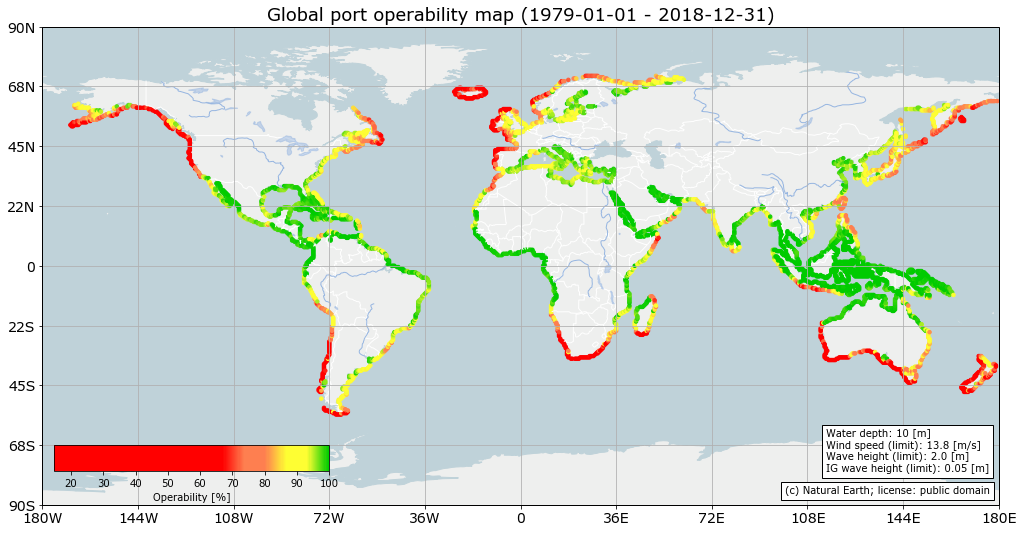

In [54]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data1['lon'],data1['lat'], c=data1['operability'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 10 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_3.png', dpi=300, bbox_inches='tight');

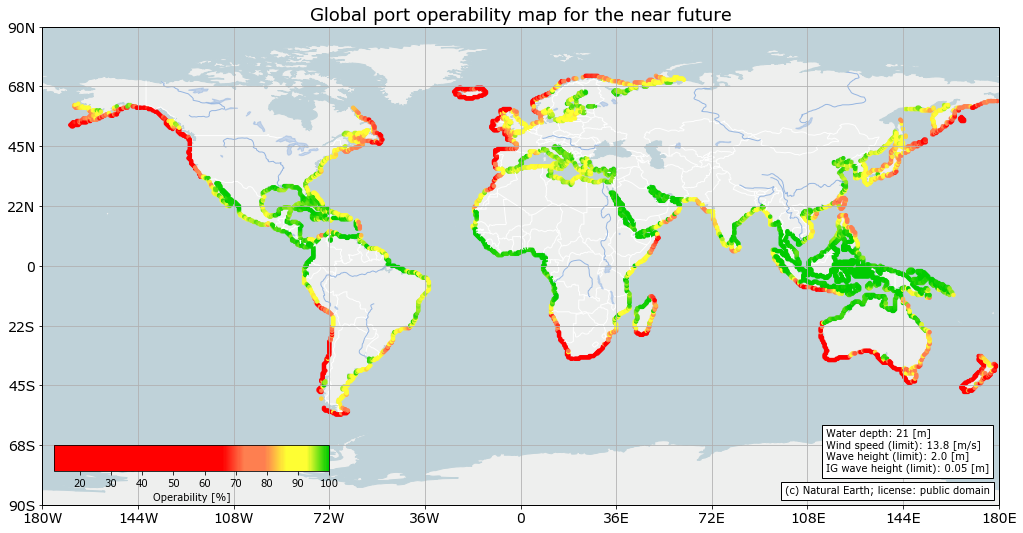

In [24]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data11['lon'],data11['lat'], c=data11['operability'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 21 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port operability map for the near future', fontsize=18)
plt.savefig('global_port_operability_map_near_future.png', dpi=300, bbox_inches='tight');

In [20]:
vulnerable_areas = data11['operability']-data1['operability']
vulnerable_areas0 = large11['operability']-large1['operability']
vulnerable_areas1 = data11['duration']-data1['duration']
vulnerable_areas2 = data11['frequency']-data1['frequency']
vulnerable_areas3 = data11['igAvUp']-data1['igAvUp']
vulnerable_areas4 = data11['swhAvUp']-data1['swhAvUp']
vulnerable_areas5 = data11['windAvUp']-data1['windAvUp']

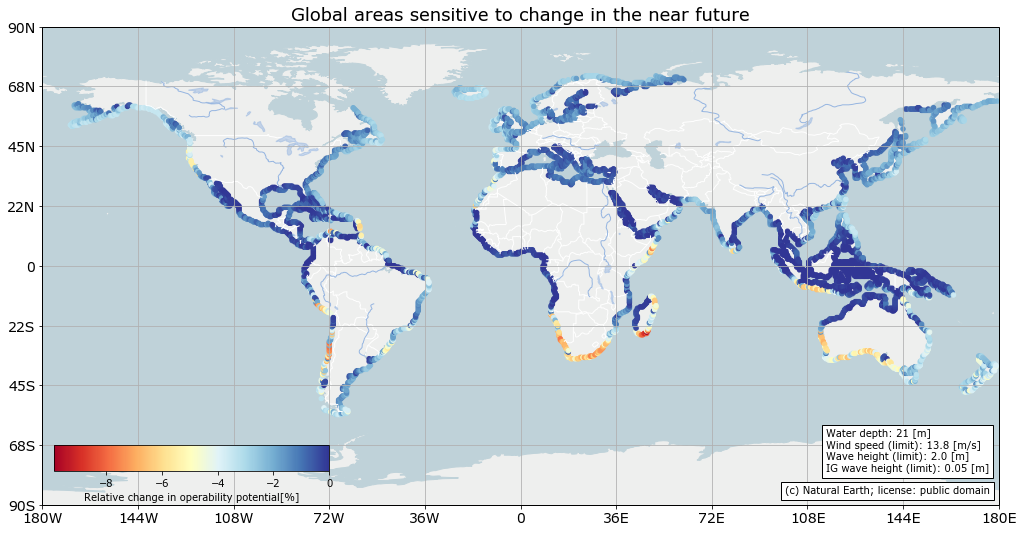

In [21]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data11['lon'],data11['lat'], c=vulnerable_areas, s=20, cmap='RdYlBu')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')#bfd2d9
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 21 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Relative change in operability potential[%]', orientation='horizontal')
ax.set_title('Global areas sensitive to change in the near future', fontsize=18)
plt.savefig('global_areas_vulnerable_tochange_map_2.png', dpi=300, bbox_inches='tight');

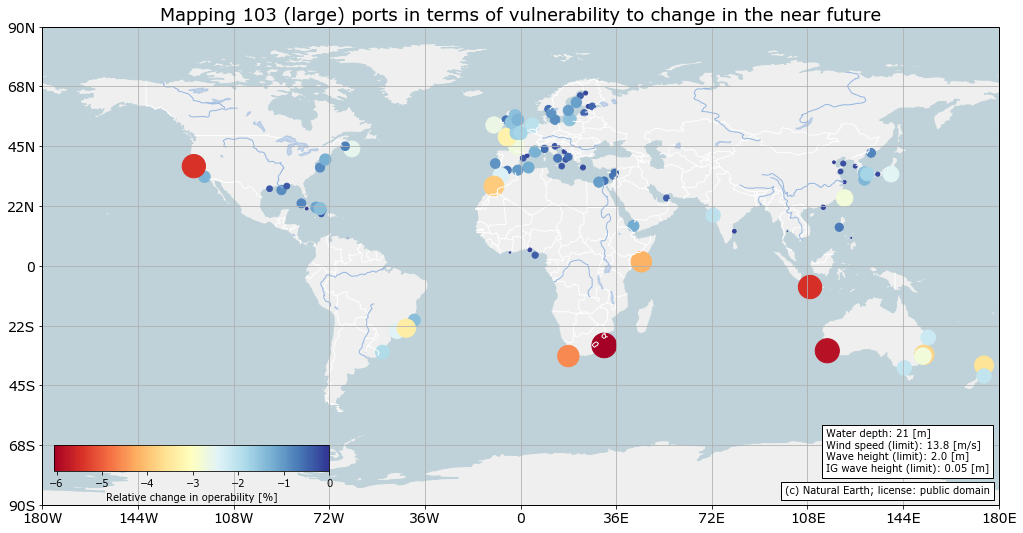

In [21]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(large11['lon'],large11['lat'], c=vulnerable_areas0, s=-100*vulnerable_areas0, cmap='RdYlBu')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')#bfd2d9
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 21 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Relative change in operability [%]', orientation='horizontal')
ax.set_title('Mapping 103 (large) ports in terms of vulnerability to change in the near future', fontsize=18)
plt.savefig('Large_ports_areas_vulnerable_tochange_map.png', dpi=300, bbox_inches='tight');

In [ ]:
x = np.arange(0.001,1.001,0.001)
operability1 = large1.operability.dropna().copy()
tot_operability1 = operability1.quantile(q=x)
operability4 = large4.operability.dropna().copy()
tot_operability4 = operability4.quantile(q=x)
operability5 = large5.operability.dropna().copy()
tot_operability5 = operability5.quantile(q=x)
operability6 = large6.operability.dropna().copy()
tot_operability6 = operability6.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability1, label='Water depth: 20 [m]')
ax.plot(x*100, tot_operability4, label='Water depth: 15 [m]')
ax.plot(x*100, tot_operability5, label='Water depth: 16 [m]')
ax.plot(x*100, tot_operability6, label='Water depth: 17 [m]')
ax.plot(0,0,color='#ffffff',label='Wind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Port operability curves for 103 large ports for different water depths', fontsize=16)
ax.set_xlabel('Number of locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='lower right', fontsize=12, markerscale=3)

plt.savefig('global_port_operability_curve_different_waterdepths_103.png', dpi=300, bbox_inches='tight');

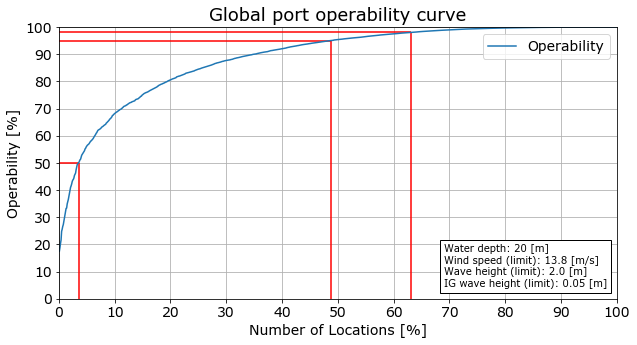

In [28]:
operability = data.operability.dropna().copy()
operability1 = np.sort(operability)
x = np.arange(0.001,1.001,0.001)
tot_operability = operability.quantile(q=x)
p50 = np.quantile(operability,0.5)
p95 = np.quantile(operability,0.95)
p98 = np.quantile(operability,0.98)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability, label='Operability')
plt.hlines(98,0,find_nearest(operability1,98)/len(operability)*100,'r')
plt.hlines(95,0,find_nearest(operability1,95)/len(operability)*100,'r')
plt.hlines(50,0,find_nearest(operability1,50)/len(operability)*100,'r')
plt.vlines(find_nearest(operability1,98)/len(operability)*100,0,98,'r')
plt.vlines(find_nearest(operability1,95)/len(operability)*100,0,95,'r')
plt.vlines(find_nearest(operability1,50)/len(operability)*100,0,50,'r')
ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right',  fontsize=14, markerscale=1)
ax.text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

plt.savefig('global_port_operability_curve_withpercentilelines.png', dpi=300, bbox_inches='tight');

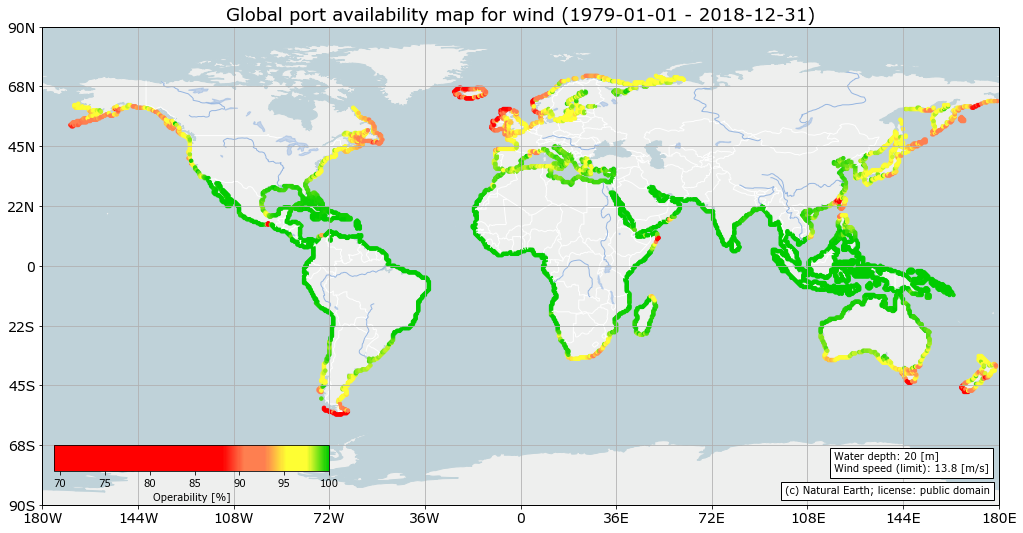

In [67]:
y = 'windAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(118, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for wind (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_wind_speed.png', dpi=300, bbox_inches='tight');

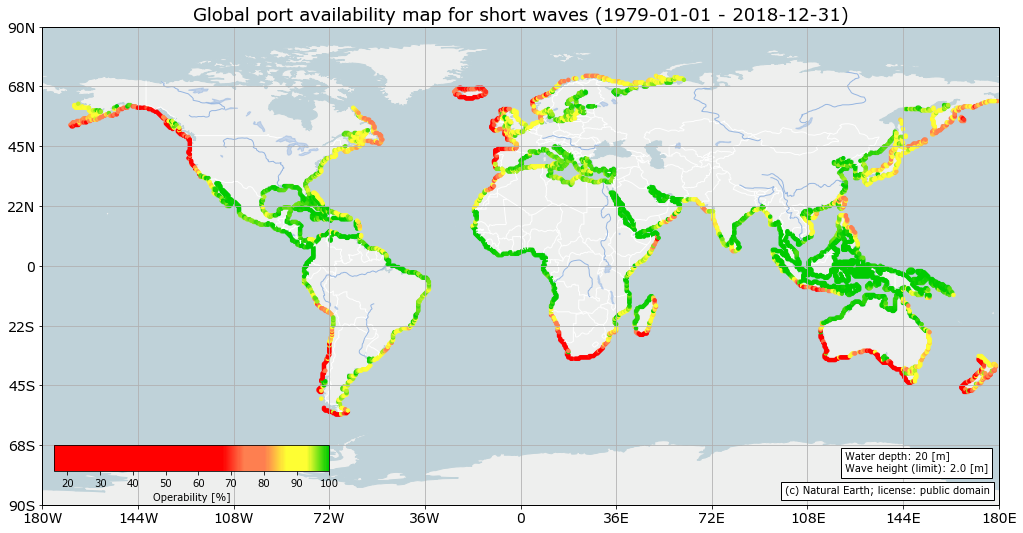

In [65]:
y = 'swhAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(122, -77.5, 'Water depth: 20 [m] \nWave height (limit): 2.0 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for short waves (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_wave_height.png', dpi=300, bbox_inches='tight');

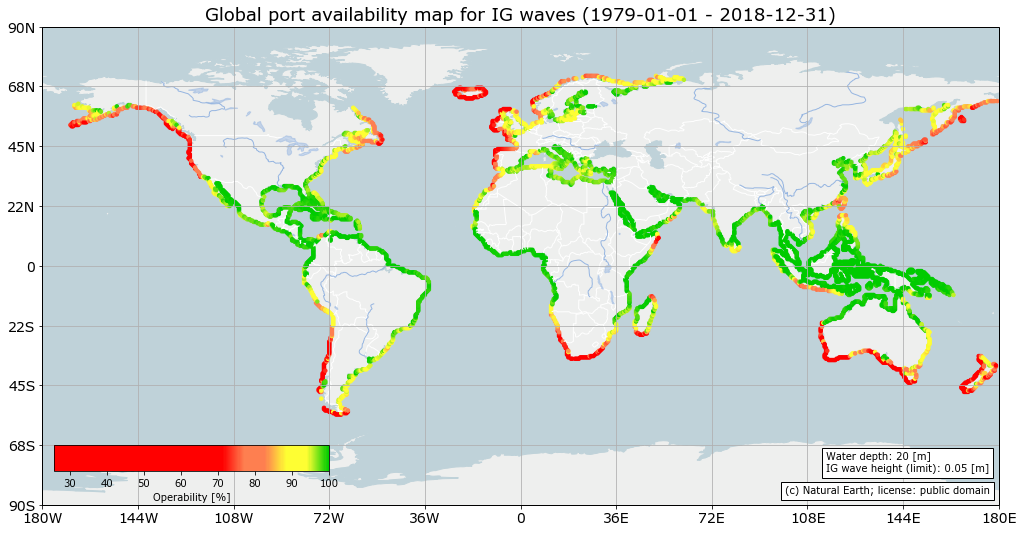

In [61]:
y = 'igAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for IG waves (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_ig_wave.png', dpi=300, bbox_inches='tight');

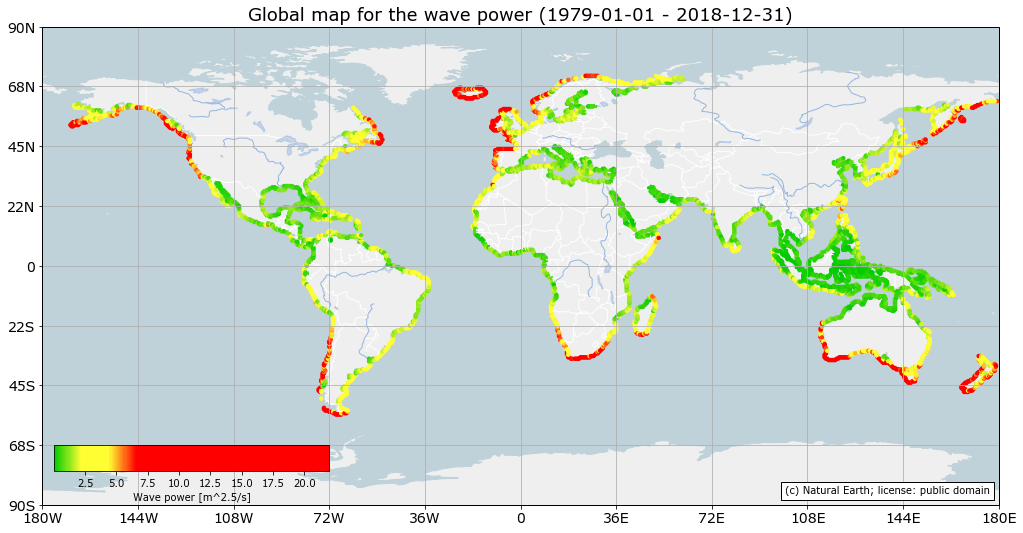

In [78]:
y = 'wavePo'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmwavepower)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
#ax.text(115, -77.5, 'Water depth: 20 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Wave power [m^2.5/s]', orientation='horizontal')
ax.set_title('Global map for the wave power (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_wave_power.png', dpi=300, bbox_inches='tight');

In [ ]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(32,76)
_ = ax.set_ylim(4,26)
_ = ax.set_xticks(np.linspace(32,76, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(4,26, num=9), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

pc = ax.scatter(data['lon'],data['lat'], c=data['operability'], s=100, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=300, label='Port of Salalah')      

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(68.1, 5.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.legend(fontsize=14)
ax.set_title('Port operability map (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_operability_map_3_zoom.png', dpi=300, bbox_inches='tight');

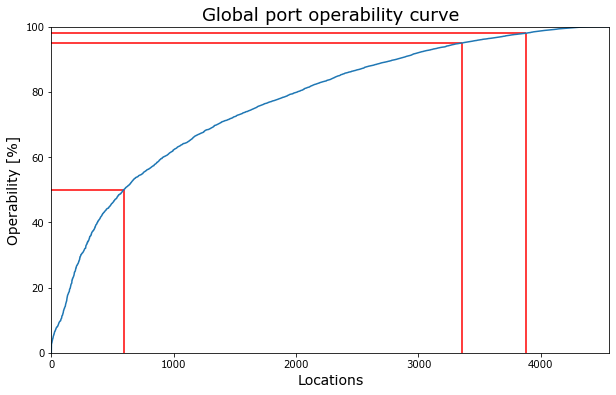

In [333]:
operability = np.sort(data7.operability)
operability[-1] = 0
p50 = np.quantile(operability,0.5)
p95 = np.quantile(operability,0.95)
p98 = np.quantile(operability,0.98)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.sort(data7.operability), label='Operability')
plt.hlines(98,0,find_nearest(operability,98),'r')
plt.hlines(95,0,find_nearest(operability,95),'r')
plt.hlines(50,0,find_nearest(operability,50),'r')
plt.vlines(find_nearest(operability,98),0,98,'r')
plt.vlines(find_nearest(operability,95),0,95,'r')
plt.vlines(find_nearest(operability,50),0,50,'r')
ax.set_ylabel('Operability [%]', size=14)
ax.set_xlabel('Locations', size=14)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlim(0,4560)
ax.set_ylim(0,100)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, ncol=1, fontsize=14)
plt.savefig('global_port_operability_curve.png', dpi=300, bbox_inches='tight');

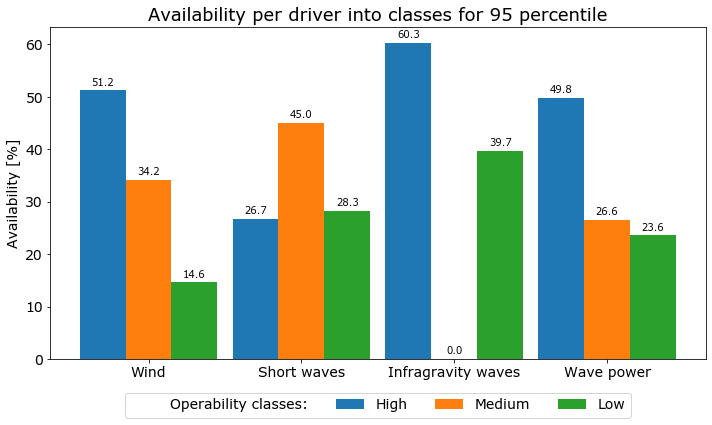

In [378]:
wind_low = round(np.sum(data6.wind95<10.8)/len(data6.wind95)*100,1)
wind_high = round(np.sum(data6.wind95>=13.8)/len(data6.wind95)*100,1)
wind_medium = round(100 - wind_low - wind_high, 1)

wave_low = round(np.sum(data6.swh95<1.5)/len(data6.swh95)*100,1)
wave_high = round(np.sum(data6.swh95>=2.5)/len(data6.swh95)*100,1)
wave_medium = round(100 - wave_low - wave_high, 1)

ig_low = round(np.sum(data6.ig95<0.05)/(len(data6.ig95)-1)*100,1)
ig_high = round(np.sum(data6.ig95>=0.05)/(len(data6.ig95)-1)*100,1)

wavepo_low = round(np.sum(data6.wavePo<1.5)/len(data6.wavePo)*100,1)
wavepo_high = round(np.sum(data6.wavePo>=3.0)/len(data6.wavePo)*100,1)
wavepo_medium = round(100 - wavepo_low - wavepo_high, 1)

labels = ['Wind', 'Short waves', 'Infragravity waves', 'Wave power']
Low = [wind_low, wave_low, ig_low, wavepo_low]
Medium = [wind_medium, wave_medium, 0, wavepo_high]
High = [wind_high, wave_high, ig_high, wavepo_medium]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects0 = ax.bar(x - width, Low, width, color='none', label='Operability classes:')
rects1 = ax.bar(x - width, Low, width, label='High')
rects2 = ax.bar(x, Medium, width, label='Medium')
rects3 = ax.bar(x + width, High, width, label='Low')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Availability [%]', size=14)
ax.set_title('Availability per driver into classes for 95 percentile', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=14)
ax.tick_params(axis='both', labelsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, ncol=5, fontsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('availability_classes_drivers_95p.png', dpi=300, bbox_inches='tight');